### Collecte de données : 2h30 
1) Scrapper des commentaires produit d'une page d'amazone (choissisez le en fonction du nombres de commentaires en français) 
    - a) identifier une url permettant de generaliser une collecte (sur toutes les pages de commentaires de ce produit):
    - exemple: https://www.amazon.fr/Asus-C423NA-BV0044-Chromebook-Pentium-Fran%C3%A7ais/product-reviews/B07H45183P/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1
    - b) Observer la page et trouver un methode pour extraire dans des listes les informations suivantes:
    commentaires
    fiabilité du comment
    nom user
    date de comment
    score de l'evaluation
    - c) Scrapper la premiere page de commentaire (10 resultats normalement)
    - d) Généraliser à l'ensemble des pages de commentaires du produit

    - nb1 : Creer une pause entre chaque requéte de 1 à 2 secondes.
    - nb2 : Si le retour de requete est different de 200, trouver un moyen de faire une pause plus longue (20 secondes) puis reprendre le scrap.

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from random import randint


In [2]:
head={"Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
"Accept-Encoding":"gzip, deflate, br",
"Accept-Language":"fr,fr-FR;q=0.8,en-US;q=0.5,en;q=0.3",
"Cache-Control":"max-age=0",
"Connection":"keep-alive",
"Host":"www.amazon.fr",
"TE":"Trailers",
"Upgrade-Insecure-Requests":"1",
"User-Agent":"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0"}

In [114]:
commentaires=[]
fiab=[]
user=[]
date=[]
score=[]

url='https://www.amazon.fr/cinq-blessures-emp%C3%AAchent-d%C3%AAtre-soi-m%C3%AAme/product-reviews/2266229486/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
r=requests.get(url,headers=head)
print(r.status_code)
soup=BeautifulSoup(r.content)

nb=int(soup.find("div",attrs={"data-hook":"cr-filter-info-review-rating-count"}).text.strip().split(' | ')[1].split(' ')[0].replace('\u202f',''))

nbf=int(nb/10)+1

for i in range(1,nbf+1):
    url='https://www.amazon.fr/cinq-blessures-emp%C3%AAchent-d%C3%AAtre-soi-m%C3%AAme/product-reviews/2266229486/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={}'.format(str(i))
    time.sleep(random.uniform(1.0, 2.0))
    r=requests.get(url,headers=head)
    print(r.status_code)
    
    if r.status_code != 200:
        time.sleep(random.uniform(15.0, 20.0))
        r=requests.get(url,headers=head)
        print(r.status_code)
    soup=BeautifulSoup(r.content)
    
    
    # Commentaires
    for elem in soup.findAll("span",attrs={"data-hook":"review-body"}):
        commentaires.append(elem.text.strip())

        
    for e in soup.findAll("div",  attrs= {"class" : "a-row a-spacing-mini review-data review-format-strip"}):
        if "Achat" in e.text:
            fiab.append('Verifie')
        else:
            fiab.append('')

    # User
    for elem in soup.findAll("span",attrs={"class":"a-profile-name"})[2:]:
        user.append(elem.text.strip())

    #date
    for elem in soup.findAll("span",attrs={"data-hook":"review-date"}):
        date.append(elem.text.strip().split('le')[1])

    # Score
    for elem in soup.findAll("i",attrs={"data-hook":"review-star-rating"}):
        score.append(elem.text.strip().split(' sur')[0].split(',')[0])

    print(len(commentaires),len(fiab),len(user),len(date),len(score))
    
        
    if (len(commentaires),len(fiab),len(user),len(date),len(score)) != (i*10,i*10,i*10,i*10,i*10):
        inde=(i-1)*10
        commentaires=commentaires[:inde]
        fiab=fiab[:inde]
        user=user[:inde]
        date=date[:inde]
        score=score[:inde]
        break

df=pd.DataFrame({'Date':date,'User':user,'Fiabilite':fiab,"Score":score,"Texte":commentaires})
df

200
200
10 10 10 10 10
200
20 20 20 20 20
200
30 30 30 30 30
200
40 40 40 40 40
200
50 50 50 50 50
200
60 60 60 60 60
200
70 70 70 70 70
200
80 80 80 80 80
200
90 90 90 90 90
200
100 100 100 100 100
200
110 110 110 110 110
200
120 120 120 120 120
200
130 130 130 130 130
200
140 140 140 140 140
200
150 150 150 150 150
200
160 160 160 160 160
200
170 170 170 170 170
200
180 180 180 180 180
200
190 190 190 190 190
200
200 200 200 200 200
200
210 210 210 210 210
200
220 220 220 220 220
200
230 230 230 230 230
200
240 240 240 240 240
200
250 250 250 250 250
200
260 260 260 260 260
200
270 270 270 270 270
200
280 280 280 280 280
200
290 290 290 290 290
200
300 300 300 300 300
200
310 310 310 310 310
200
320 320 320 320 320
200
330 330 330 330 330
200
340 340 340 340 340
200
350 350 350 350 350
200
360 360 360 360 360
200
370 370 370 370 370
200
380 380 380 380 380
200
390 390 390 390 390
200
400 400 400 400 400
200
410 410 410 410 410
200
420 420 420 420 420
200
430 430 430 430 430
200
440 4

,Date,User,Fiabilite,Score,Texte
0,6 janvier 2019,DELORME,Verifie,1,"Franchement, je me suis arrêté au chapitre 1. ..."
1,15 novembre 2019,P. Greg,Verifie,4,"Lise Bourbeau, l'auteur de ces Cinq blessures ..."
2,25 février 2017,Karen Payet,Verifie,2,"Un peu déçue...Lise Bourbeau décrit les ""5 ble..."
3,12 juin 2018,CPE,Verifie,1,Un livre à l'américaine qui fait très secte ! ...
4,25 avril 2018,Mod S,Verifie,1,Le contenu de ce livre est complètement délira...
...,...,...,...,...,...
985,29 avril 2019,Client d'Amazon,Verifie,5,Super
986,17 décembre 2019,Haissant,Verifie,5,très bien
987,6 mars 2019,sabine PEZZICOLO,Verifie,5,À lire très agréable et très instructif
988,6 octobre 2019,fabre,Verifie,5,Très bien


In [116]:
df.to_csv('Scrap_Amazone.csv',index=False)

In [164]:
df=pd.read_csv('Scrap_Amazone.csv')

## 1h
2) Rangement des infos dans un DataFrame et analyse macro
    - a) Verifier la longueur de vos listes, elles doivent être égales.
    - b) Construisez un DataFrame avec les informations scrappées
    - c) Extraire une distribution des notes attribuées au produit.
    - d) Extraire une distribution de la longueur des commentaires (nombre de mots).

In [165]:
def compute_nb_word(x):
    return len(x.split(' '))

In [166]:
# 1 avec une fonction definie
df['nb_mots']=df['Texte'].apply(compute_nb_word)
df

,Date,User,Fiabilite,Score,Texte,nb_mots
0,6 janvier 2019,DELORME,Verifie,1,"Franchement, je me suis arrêté au chapitre 1. ...",188
1,15 novembre 2019,P. Greg,Verifie,4,"Lise Bourbeau, l'auteur de ces Cinq blessures ...",248
2,25 février 2017,Karen Payet,Verifie,2,"Un peu déçue...Lise Bourbeau décrit les ""5 ble...",58
3,12 juin 2018,CPE,Verifie,1,Un livre à l'américaine qui fait très secte ! ...,29
4,25 avril 2018,Mod S,Verifie,1,Le contenu de ce livre est complètement délira...,20
...,...,...,...,...,...,...
985,29 avril 2019,Client d'Amazon,Verifie,5,Super,1
986,17 décembre 2019,Haissant,Verifie,5,très bien,2
987,6 mars 2019,sabine PEZZICOLO,Verifie,5,À lire très agréable et très instructif,7
988,6 octobre 2019,fabre,Verifie,5,Très bien,2


In [167]:
# 2 avec une fonction jetable (lambda function)
df['nb_mots']=df['Texte'].apply(lambda x:len(x.split(' ')))
df

,Date,User,Fiabilite,Score,Texte,nb_mots
0,6 janvier 2019,DELORME,Verifie,1,"Franchement, je me suis arrêté au chapitre 1. ...",188
1,15 novembre 2019,P. Greg,Verifie,4,"Lise Bourbeau, l'auteur de ces Cinq blessures ...",248
2,25 février 2017,Karen Payet,Verifie,2,"Un peu déçue...Lise Bourbeau décrit les ""5 ble...",58
3,12 juin 2018,CPE,Verifie,1,Un livre à l'américaine qui fait très secte ! ...,29
4,25 avril 2018,Mod S,Verifie,1,Le contenu de ce livre est complètement délira...,20
...,...,...,...,...,...,...
985,29 avril 2019,Client d'Amazon,Verifie,5,Super,1
986,17 décembre 2019,Haissant,Verifie,5,très bien,2
987,6 mars 2019,sabine PEZZICOLO,Verifie,5,À lire très agréable et très instructif,7
988,6 octobre 2019,fabre,Verifie,5,Très bien,2


In [169]:
def date_replace(x):
    mois={"janvier":"01","février":"02","mars":"03","avril":"04",'mai':"05","juin":"06","juil":"07","juillet":"07","août":"08",
     "septembre":"09","octobre":"10","novembre":"11","décembre":"12"}
    x=x.strip()
    d=str(x.split(' ')[0])
    m=mois[x.split(' ')[1]]
    try:
        y=str(x.split(' ')[2])
    except:
        y=str(2020)
    return str(y+'-'+m+'-'+d)
    

In [170]:
import datetime

df['Datetime']=df['Date'].apply(lambda x:date_replace(x)).apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))

In [220]:
df.head()

,Date,User,Fiabilite,Score,Texte,nb_mots,Datetime
0,6 janvier 2019,DELORME,Verifie,1,"Franchement, je me suis arrêté au chapitre 1. ...",188,2019-01-06
1,15 novembre 2019,P. Greg,Verifie,4,"Lise Bourbeau, l'auteur de ces Cinq blessures ...",248,2019-11-15
2,25 février 2017,Karen Payet,Verifie,2,"Un peu déçue...Lise Bourbeau décrit les ""5 ble...",58,2017-02-25
3,12 juin 2018,CPE,Verifie,1,Un livre à l'américaine qui fait très secte ! ...,29,2018-06-12
4,25 avril 2018,Mod S,Verifie,1,Le contenu de ce livre est complètement délira...,20,2018-04-25


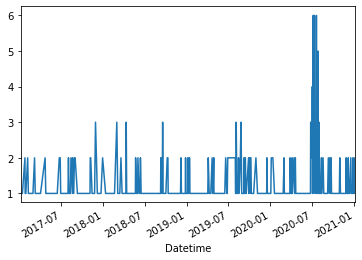

In [189]:
df.groupby(by='Datetime')['Date'].count().plot(xlim=["2017-01-06","2021-01-06"]);

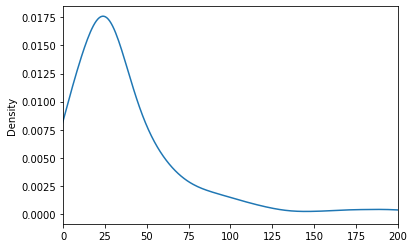

In [122]:
df['nb_mots'].plot(kind='kde',xlim=[0,200]);

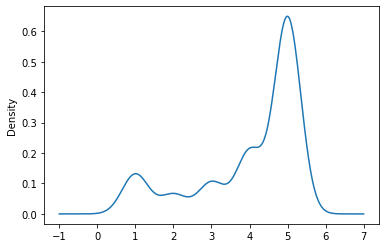

In [223]:
df['Score'].plot(kind='kde');

# 2h30
3) Word count ou occurence de chaque mot du corpus de commentaire
    - a) Construisez une fonction qui extrait le nombre de mot unique d'une chaine de caractere 
    - b) En appliquant cette fonction, extrayez la liste des mots uniques de tout votre corpus
    - c) Construisez maintenant un fonction qui renvoie un dictionnaire (liste de mot unique et occurence de ce mot) d'une chaine de caractere
    - d) Appliquer cette fonction à votre corpus de commentaire
    - e) Observer vos résultats à l'aide d'un bargraph


nb: Sans utiliser de fonctions issues d'un module

In [251]:
#a) Construisez une fonction qui extrait le nombre de mot unique d'une chaine de caractere 
def mot_unique(x):
    return list(set(x.split()))

In [255]:
len(mot_unique(df['Texte'].loc[0])),len(df['Texte'].loc[0].split())

(120, 188)

In [256]:
#b) En appliquant cette fonction, extrayez la liste des mots uniques de tout votre corpus
fin=[]
for elem in df['Texte']:
    fin=fin+mot_unique(elem)
final=list(set(fin))
final

['livre.Mais',
 'tête,',
 'demande',
 'vu',
 'empechent',
 'dira',
 'livre.',
 'tombant',
 'lire.Un',
 'soir,',
 'cest',
 'français',
 'masques,',
 'disposition',
 'vue.',
 "d'informations),",
 'résumé',
 'relate',
 'données',
 "l'enfance.",
 'clair',
 'sac,',
 'psychanalyste,',
 'expédié',
 'sœur',
 'fonctionnement',
 'dépasser.',
 'celui-ci',
 "J'adore,",
 'déconseiller',
 'À',
 'vous),',
 'lu!',
 'déconseillerais',
 'croient',
 'prévisions',
 'malgré',
 'fuis',
 'doutes',
 'courant',
 'vécu',
 'amis',
 'souffrant',
 'vies,',
 'appuyer',
 '25/09/2013',
 'expérience,',
 'Mc',
 "l'auteurs",
 'vraiment',
 'lecteur.',
 'alors',
 '?Qui',
 'causées',
 "l'égo",
 'rejetées',
 'inconsciemment,',
 'impression)',
 "d'exemples",
 'partiellement,',
 'colle.',
 'asseoir',
 'gardant',
 'LOL',
 'conseille',
 'plaît',
 'vronchotes',
 "d'Oedipe,",
 'passez',
 'Sauf',
 'livre...on',
 'onde',
 'état,',
 'saute',
 "d'autant",
 'marketeuse',
 'inconsciente,',
 'aimons',
 'équilibrée!',
 'blessures',
 'pro

In [257]:
# c) Construisez maintenant un fonction qui renvoie un dictionnaire (liste de mot unique et occurence de ce mot) d'une chaine de caractere
def wc(x):
    d={}
    for elem in mot_unique(x):
        d[elem]=x.count(elem)
    return dict(sorted(d.items(), key=lambda item: item[1],reverse=True))

In [259]:
wc(df['Texte'].loc[1])

{'a': 86,
 'en': 26,
 'le': 26,
 'ou': 25,
 'de': 18,
 'les': 15,
 'se': 11,
 'son': 10,
 'ne': 9,
 'et': 9,
 'sur': 8,
 'la': 8,
 'ce': 8,
 'à': 7,
 'blessure': 7,
 'il': 7,
 'que': 7,
 'si': 6,
 'ont': 6,
 'blessures': 6,
 'nous': 5,
 'des': 5,
 'qui': 5,
 'même': 4,
 'un': 4,
 'par': 4,
 'mais': 4,
 ':': 3,
 'est': 3,
 'masque': 3,
 'y': 3,
 'mentale': 3,
 'notre': 3,
 'mes': 3,
 'une': 3,
 'nos': 2,
 'porte': 2,
 'plus': 2,
 'blessures,': 2,
 'ses': 2,
 'pour': 2,
 "m'a": 2,
 'fait': 2,
 'comprendre': 2,
 'pas': 2,
 'fonction': 2,
 'personne': 2,
 'souffrant': 2,
 'masques': 2,
 'peut': 2,
 'Lise': 2,
 "d'humiliation": 2,
 'Bourbeau,': 2,
 'masochiste,': 2,
 'sont': 2,
 'livre': 2,
 'appris': 1,
 'pardonner': 1,
 'écriture': 1,
 'soi-même,': 1,
 'mangeant...La': 1,
 'comportement': 1,
 'aussi': 1,
 'poussive...Pourtant,': 1,
 'éviter': 1,
 'tacher': 1,
 'ces': 1,
 'dont': 1,
 'contribuer.': 1,
 'masques,': 1,
 'gravité': 1,
 'tendance': 1,
 'selon': 1,
 'nous-mêmes': 1,
 'cas': 1,


In [260]:
#d)Appliquer cette fonction à votre corpus de commentaire
res=wc(' '.join(list(df['Texte'])))

In [261]:
res

{'s': 15627,
 'n': 12692,
 't': 12243,
 'a': 11314,
 'l': 8758,
 'c': 6476,
 'd': 5668,
 'm': 5573,
 'es': 4896,
 'en': 3405,
 'le': 3068,
 'on': 3051,
 'de': 2893,
 'ou': 2820,
 '.': 2804,
 'ai': 2194,
 'me': 2014,
 'qu': 2009,
 'er': 1992,
 "'": 1970,
 'et': 1765,
 'te': 1715,
 'an': 1713,
 'ce': 1512,
 ',': 1496,
 'se': 1488,
 'ne': 1345,
 'in': 1141,
 'eu': 1141,
 'que': 1125,
 'les': 1125,
 'su': 1076,
 'pr': 1067,
 'au': 1065,
 'à': 969,
 'ma': 943,
 'la': 896,
 'un': 895,
 'ment': 868,
 'as': 826,
 'j': 821,
 'il': 817,
 'livre': 806,
 'sur': 801,
 'est': 736,
 'si': 662,
 'sa': 595,
 'pas': 558,
 'des': 552,
 'qui': 542,
 'y': 533,
 'son': 527,
 'lu': 524,
 'pour': 501,
 'je': 480,
 'ta': 480,
 "l'": 473,
 'ci': 465,
 'mm': 448,
 'J': 438,
 'L': 427,
 'ait': 426,
 'par': 421,
 '..': 390,
 '!': 383,
 'blessure': 379,
 'na': 377,
 'ans': 376,
 "d'": 373,
 'une': 362,
 'rend': 353,
 'C': 342,
 'prend': 342,
 'nous': 328,
 'ont': 322,
 'tout': 317,
 'elle': 316,
 'blessures': 314,


In [262]:
pd.DataFrame({'occurences':list(res.values())[:20],'mot':list(res.keys())[:20]})

,occurences,mot
0,15627,s
1,12692,n
2,12243,t
3,11314,a
4,8758,l
5,6476,c
6,5668,d
7,5573,m
8,4896,es
9,3405,en


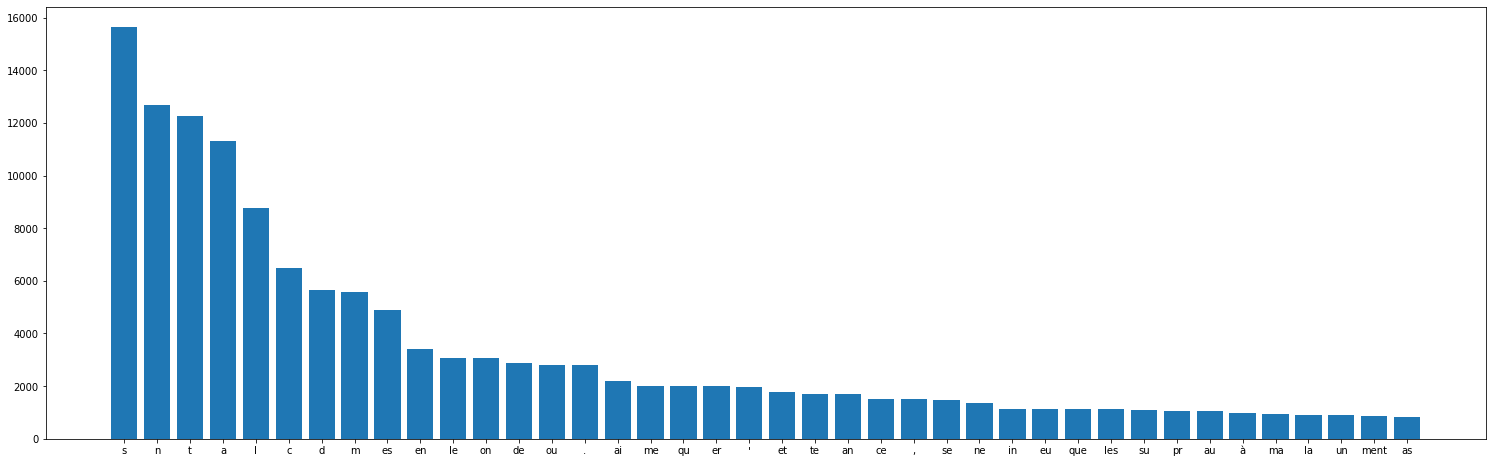

In [263]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax = fig.add_axes([0,0,1,1])
langs = list(res.keys())[:40]
students = list(res.values())[:40]
ax.bar(langs,students)
plt.show()

Enlevons ces mots sémantiquement "neutres" !

==> Les stops_words